# **Lending Club Study**
**Table of content**


**Background** :-
Lending club is the largest pear to pear market place connecting borrowers with the lenders. Borrowers apply through and online platform and where they are assigned and internal score. Lenders decide 1) Whether to lend and 2) The terms of loans such as interest rate, monthly installment tenure, etc.
Some popular products are debt consolidation loan, house loan, car loan, etc.



**Business Objective** :- To identify variable which are strong indicator of default and potential used the insights in approval/ rejection decision making.


**Technology Used** :- Python & jupyter

**Libraries used** :- Pandas, Numpy, Matplotlib, Seaborn, plotly.express

# **Data Cleaning**

**Importing libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

**Uploading Data to "df"**

In [ ]:
df = pd.read_csv("/content/loan.csv")

<ipython-input-4-30ab74ca8883>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/loan.csv")


In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

**Basic details of the Dataframe**


In [ ]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',df.shape[1])
print('Number of Rows:',df.shape[0])
## Number of missing values
print('Number of missing values:',df.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',df.nunique().sum())
## Number of duplicates
print('Number of duplicates:',df.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263366
Number of unique values: 416800
Number of duplicates: 0


**Describing the dataframe**

In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# **Finding null values and Visualization**

In [ ]:
df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


**Treating null values**

In [ ]:
percentage_missing = np.round( (df.isnull().sum()) / (len(df))*100,2)
percentage_missing = percentage_missing.sort_values(ascending=False)
percentage_missing

,0
verification_status_joint,100.00
annual_inc_joint,100.00
mo_sin_old_rev_tl_op,100.00
mo_sin_old_il_acct,100.00
bc_util,100.00
bc_open_to_buy,100.00
avg_cur_bal,100.00
acc_open_past_24mths,100.00
inq_last_12m,100.00
total_cu_tl,100.00


In [ ]:
treshold = 50
percent_missing = (df.isnull().sum() / len(df)) * 100
columns_to_drop = percent_missing[percent_missing >= treshold].index
df = df.drop(columns=columns_to_drop)

50% NAN values in the columns has been droped


In [ ]:
df['desc']

,desc
0,Borrower added on 12/22/11 > I need to upgra...
1,Borrower added on 12/22/11 > I plan to use t...
2,NaN
3,Borrower added on 12/21/11 > to pay for prop...
4,Borrower added on 12/21/11 > I plan on combi...
...,...
39712,Our current gutter system on our home is old a...
39713,The rate of interest and fees incurred by carr...
39714,NaN
39715,NaN


In [ ]:
df = df.drop('desc', axis=1)

In [ ]:
df.shape

(39717, 53)

In [ ]:
df['emp_title']

,emp_title
0,NaN
1,Ryder
2,NaN
3,AIR RESOURCES BOARD
4,University Medical Group
...,...
39712,FiSite Research
39713,"Squarewave Solutions, Ltd."
39714,NaN
39715,NaN


In [ ]:
df['emp_length']

,emp_length
0,10+ years
1,< 1 year
2,10+ years
3,10+ years
4,1 year
...,...
39712,4 years
39713,3 years
39714,< 1 year
39715,< 1 year


In [ ]:
df.groupby('emp_length')['emp_length'].count()

,emp_length
emp_length,
1 year,3240
10+ years,8879
2 years,4388
3 years,4095
4 years,3436
5 years,3282
6 years,2229
7 years,1773
8 years,1479


In [ ]:
df['emp_length'].mode()

,emp_length
0,10+ years


In [ ]:
mode_emp_length = df['emp_length'].mode()[0]  # Get the first mode (in case there are multiple modes)
df['emp_length'] = df['emp_length'].fillna(mode_emp_length)

In [ ]:
df['pub_rec_bankruptcies'].describe()

,pub_rec_bankruptcies
count,39020.000000
mean,0.043260
std,0.204324
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [ ]:
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(0)
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

In [ ]:
percentage_missing = np.round( (df.isnull().sum()) / (len(df))*100,2)
percentage_missing = percentage_missing.sort_values(ascending=False)
percentage_missing

,0
emp_title,6.19
pub_rec_bankruptcies,1.75
last_pymnt_d,0.18
revol_util,0.13
tax_liens,0.10
title,0.03
last_credit_pull_d,0.01
total_rec_int,0.00
total_acc,0.00
initial_list_status,0.00


In [ ]:
df['revol_util']

,revol_util
0,83.70%
1,9.40%
2,98.50%
3,21%
4,53.90%
...,...
39712,13.10%
39713,26.90%
39714,19.40%
39715,0.70%


In [ ]:
df['revol_util'] = df['revol_util'].apply(lambda x: str(x).rstrip('%') if isinstance(x, str) else x)
#Convert to numeric to make computations easier
df['revol_util'] = pd.to_numeric(df['revol_util'])

In [ ]:
df['revol_util'].isnull().sum()

50

In [ ]:
df['revol_util'].describe()

,revol_util
count,39667.000000
mean,48.832152
std,28.332634
min,0.000000
25%,25.400000
50%,49.300000
75%,72.400000
max,99.900000


In [ ]:
Q1 = df['revol_util'].quantile(0.25)
Q3 = df['revol_util'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['revol_util'] < lower_bound) | (df['revol_util'] > upper_bound)]['revol_util']

# **Conclusions**

In [ ]:
import plotly.express  as px
fig8 = px.histogram(df, x = 'revol_util', marginal = 'box',
                    title = 'Distribution of revol_util',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig8.show()

In [ ]:
len(outliers)

0

In [ ]:
mean_revol_util = df['revol_util'].mean()
df['revol_util'] = df['revol_util'].fillna(mean_revol_util)

In [ ]:
df['tax_liens'] = df['tax_liens'].fillna(0)

In [ ]:
percentage_missing = np.round( (df.isnull().sum()) / (len(df))*100,2)
percentage_missing = percentage_missing.sort_values(ascending=False)
percentage_missing

,0
emp_title,6.19
pub_rec_bankruptcies,1.75
last_pymnt_d,0.18
title,0.03
last_credit_pull_d,0.01
id,0.00
total_rec_int,0.00
revol_util,0.00
total_acc,0.00
initial_list_status,0.00


In [ ]:
df.shape

(39717, 53)

In [ ]:
# remove unwanted columns
df = df.drop(['title','emp_title','url'],axis=1)

In [ ]:
df.shape

(39717, 50)

In [ ]:
df.nunique().sort_values(ascending=True)

,0
tax_liens,1
initial_list_status,1
collections_12_mths_ex_med,1
policy_code,1
pymnt_plan,1
acc_now_delinq,1
chargeoff_within_12_mths,1
delinq_amnt,1
application_type,1
term,2


In [ ]:
# remove single unique value
# df = df.drop(['tax_liens','initial_list_status','collections_12_mths_ex_med', 'policy_code', 'pymnt_plan', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'application_type'],axis=1)

In [ ]:
df.shape

(39717, 50)

In [ ]:
percentage_missing = np.round( (df.isnull().sum()) / (len(df))*100,2)
percentage_missing = percentage_missing.sort_values(ascending=False)
percentage_missing

,0
pub_rec_bankruptcies,1.75
last_pymnt_d,0.18
last_credit_pull_d,0.01
id,0.00
total_rec_late_fee,0.00
revol_util,0.00
total_acc,0.00
initial_list_status,0.00
out_prncp,0.00
out_prncp_inv,0.00


In [ ]:
df = df.dropna(subset=['pub_rec_bankruptcies'])

In [ ]:
df = df.dropna(subset=['last_credit_pull_d'])

In [ ]:
df = df.dropna(subset=['last_pymnt_d'])

In [ ]:
df.shape

(38948, 50)

In [ ]:
# remove single unique value
df = df.drop(['member_id'],axis=1)

In [ ]:
df.shape

(38948, 49)

In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
percentage_missing = np.round( (df.isnull().sum()) / (len(df))*100,2)
percentage_missing = percentage_missing.sort_values(ascending=False)
percentage_missing

,0
id,0.0
revol_bal,0.0
total_acc,0.0
initial_list_status,0.0
out_prncp,0.0
out_prncp_inv,0.0
total_pymnt,0.0
total_pymnt_inv,0.0
total_rec_prncp,0.0
total_rec_int,0.0


In [ ]:
#Post cleaning information about the data
## Number of rows and columns
print('Number of Columns:',df.shape[1])
print('Number of Rows:',df.shape[0])
## Number of missing values
print('Number of missing values:',df.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',df.nunique().sum())
## Number of duplicates
print('Number of duplicates:',df.duplicated().sum())

Number of Columns: 49
Number of Rows: 38948
Number of missing values: 0
Number of unique values: 257290
Number of duplicates: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38948 entries, 0 to 39680
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38948 non-null  int64  
 1   loan_amnt                   38948 non-null  int64  
 2   funded_amnt                 38948 non-null  int64  
 3   funded_amnt_inv             38948 non-null  float64
 4   term                        38948 non-null  object 
 5   int_rate                    38948 non-null  object 
 6   installment                 38948 non-null  float64
 7   grade                       38948 non-null  object 
 8   sub_grade                   38948 non-null  object 
 9   emp_length                  38948 non-null  object 
 10  home_ownership              38948 non-null  object 
 11  annual_inc                  38948 non-null  float64
 12  verification_status         38948 non-null  object 
 13  issue_d                     38948 no

In [ ]:
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [ ]:
df.shape

(38948, 49)

In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
#remove % from int_rate
df['int_rate'] = df['int_rate'].apply(lambda x: x.replace('%', '') if str(x)[0].isdigit() else x)

In [ ]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [ ]:
#remove year keyword from emp_length column
df['emp_length'] = df['emp_length'].str.replace(r'\b(year|years)\b', '', regex=True)

In [ ]:
df['emp_length'].unique()

array(['10+ ', '< 1 ', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ',
       '7 '], dtype=object)

In [ ]:
df['emp_length'] = df['emp_length'].str.replace('+', '', regex=False)

In [ ]:
df['emp_length'].unique()

array(['10 ', '< 1 ', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ',
       '7 '], dtype=object)

In [ ]:
df['emp_length'] = df['emp_length'].str.replace('< 1', '0.5', regex=False)

In [ ]:
df['emp_length'].unique()

array(['10 ', '0.5 ', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ',
       '7 '], dtype=object)

In [ ]:
df['emp_length'].unique()

array(['10 ', '0.5 ', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ',
       '7 '], dtype=object)

In [ ]:
df['emp_length'] = df['emp_length'].str.replace(' ', '').astype(float)

In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
#remove months keyword from term column
df['term'] = df['term'].str.strip().str.extract('(\d+)').astype(int)

In [ ]:
df['term'].unique()

array([36, 60])

In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [ ]:
df.select_dtypes(include=['object'])

,int_rate,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,10.65,B,B2,RENT,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,Jan-85,f,Jan-15,May-16,INDIVIDUAL
1,15.27,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,15.96,C,C5,RENT,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,Nov-01,f,Jun-14,May-16,INDIVIDUAL
3,13.49,C,C1,RENT,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,Feb-96,f,Jan-15,Apr-16,INDIVIDUAL
4,12.69,B,B5,RENT,Source Verified,Dec-11,Current,n,other,972xx,OR,Jan-96,f,May-16,May-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,10.28,C,C1,RENT,Not Verified,Nov-07,Fully Paid,n,debt_consolidation,226xx,VA,Mar-00,f,Aug-08,Aug-08,INDIVIDUAL
39573,10.59,C,C2,MORTGAGE,Not Verified,Nov-07,Fully Paid,n,debt_consolidation,853xx,AZ,Feb-89,f,May-10,Apr-16,INDIVIDUAL
39623,12.49,D,D3,MORTGAGE,Not Verified,Oct-07,Charged Off,n,debt_consolidation,207xx,MD,Aug-97,f,May-08,May-16,INDIVIDUAL
39666,11.22,C,C4,MORTGAGE,Not Verified,Aug-07,Charged Off,n,debt_consolidation,201xx,VA,Nov-92,f,Oct-09,Mar-10,INDIVIDUAL


In [ ]:
df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip('%'), errors='coerce')

In [ ]:
df.dtypes

,0
id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,int64
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_length,float64


In [ ]:
df = df.astype({'funded_amnt': 'float', 'loan_amnt': 'float'})

In [ ]:
df['grade'].value_counts()

,count
grade,
B,11796
A,9937
C,7890
D,5183
E,2798
F,1032
G,312


In [ ]:
## will read cleaned data into other dataset

In [ ]:
df.to_csv('loan_data_cleaned.csv', index=False)

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.shape

(38948, 49)

In [ ]:
# cleaning
df_cleaned = df_cleaned[df_cleaned['loan_status']!='Current']

In [ ]:
df_cleaned.shape

(37808, 49)

In [ ]:
df_cleaned['issue_d'] = pd.to_datetime(df_cleaned['issue_d'], format='%b-%y') #Convert to datetime
df_cleaned['issue_year'] = df_cleaned['issue_d'].dt.year
df_cleaned['issue_month'] = df_cleaned['issue_d'].dt.month

<ipython-input-80-30915e66f446>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-30915e66f446>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-30915e66f446>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_cleaned.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year,issue_month
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12


<Axes: xlabel='home_ownership'>

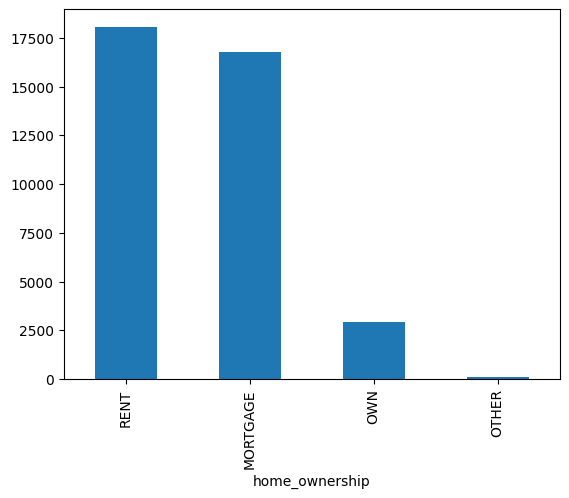

In [ ]:
# Unordered Categorical Variable Analysis
# 1. home_ownership : We can see majority of the loan taken by people who are on "RENT" and "MORTGAGE"
df_cleaned['home_ownership'].value_counts().plot.bar()

<Axes: xlabel='purpose'>

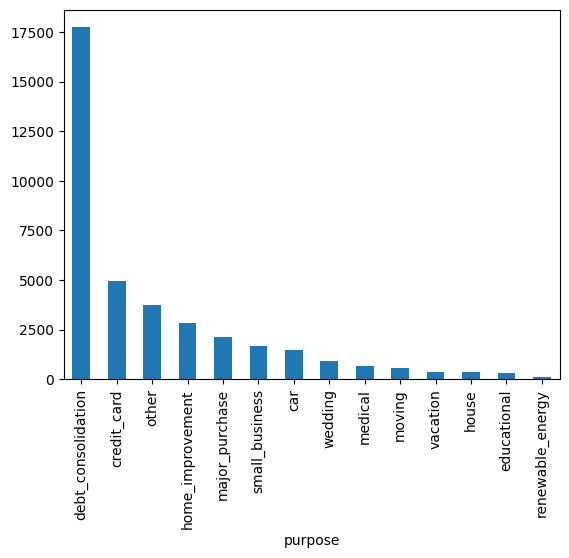

In [ ]:
#2.purpose : major purpose of loan is "debt_consolidation"
df_cleaned['purpose'].value_counts().plot.bar()

<Axes: xlabel='addr_state'>

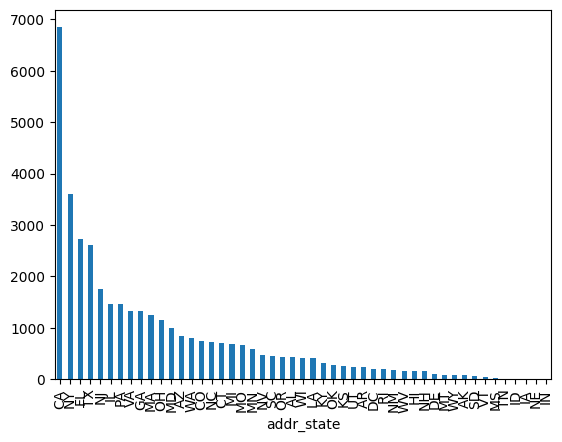

In [ ]:
#3.addr_state: most of the loan take from address state CA
df_cleaned['addr_state'].value_counts().plot.bar()

<Axes: ylabel='count'>

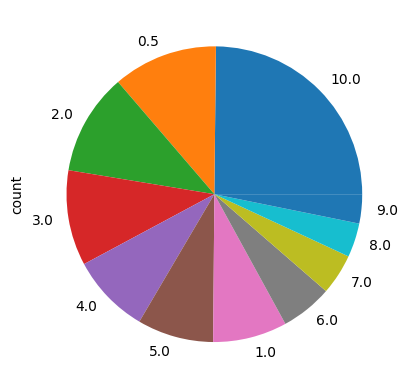

In [ ]:
# 4.emp_length = we can see from the below pie diagram that more than 10 years of employment length are majority of loan taken,
# but we can not ignore the length period of employees less than 1 year which are the 2nd highest after more than 10 years.
# Furthermore, we will consider emp_length in bivariant analysis too, to get more clarification.
df_cleaned['emp_length'].value_counts().sort_values(ascending=False).plot(kind='pie')

In [ ]:
  def bin_loan_amt(column):
      if column <= 5000:
          return '0 - 5K'
      elif (column > 5000 ) and (column <= 10000):
          return '5K - 10K'
      elif (column > 10000) and (column <= 15000):
          return '10K - 15K'
      else:
          return '15K - Above'

  df_cleaned['loan_amnt_bin'] = df_cleaned.apply(lambda x: bin_loan_amt(x['loan_amnt']), axis = 1 )

In [ ]:
df_cleaned.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year,issue_month,loan_amnt_bin,int_rate_bin
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,Medium
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,High
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,High
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,5K - 10K,Medium
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,Low


In [ ]:
int_rate_range = df_cleaned['int_rate'].max() - df_cleaned['int_rate'].min()
int_rate_range, df_cleaned['int_rate'].max(), df_cleaned['int_rate'].min()

(18.979999999999997, 24.4, 5.42)

In [ ]:
df_cleaned['int_rate'].value_counts()

,count
int_rate,
10.99,913
7.51,786
11.49,786
13.49,747
7.88,725
...,...
17.46,1
20.52,1
16.01,1


In [ ]:
# binning the interest rate
def bin_int_rate(column):
    if column <= 5:
        return "Very Low"
    elif (column > 5) and (column <= 10):
        return "Low"
    elif (column > 10) and (column <= 15):
        return "Medium"
    elif (column > 15) and (column <= 20):
        return "High"
    else:
        return "Very High"

df_cleaned['int_rate_bin'] = df_cleaned.apply(lambda x: bin_int_rate(x['int_rate']), axis = 1 )

In [ ]:
df_cleaned.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year,issue_month,loan_amnt_bin,int_rate_bin
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,Medium
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,High
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,High
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,5K - 10K,Medium
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,Low


<Axes: ylabel='count'>

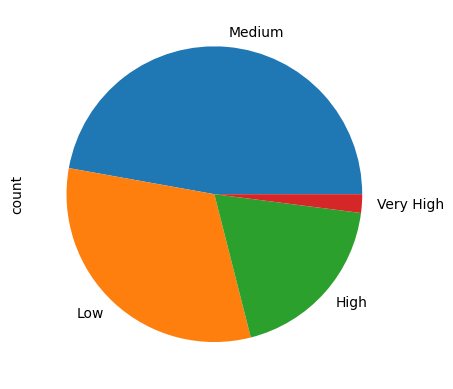

In [ ]:
#5. int_rate_bin : are distrubuted uneven. There are "LOW" int rate also available, which we can consider in bivariant analysis
df_cleaned["int_rate_bin"].value_counts().plot(kind='pie')

**verification_status bar plot**

<Axes: xlabel='verification_status'>

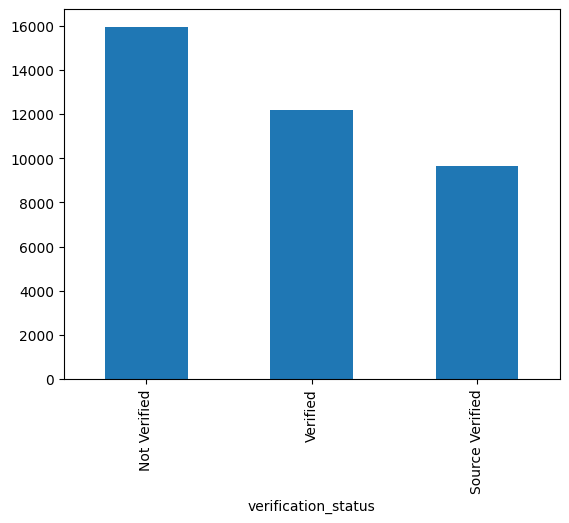

In [ ]:
#6.verification_status: surpisingly there are more head counts of verification status which are "NOT VERIFIED".
df_cleaned["verification_status"].value_counts().plot.bar()

In [ ]:
df_cleaned.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'issue_year',
       'issue_month', 'loan_amnt_bin', 'int_rate_bin'],
      dtype='object')

In [ ]:
df_cleaned.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year,issue_month,loan_amnt_bin,int_rate_bin
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,Medium
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,High
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,High
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,5K - 10K,Medium
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,0 - 5K,Low


**Distribution of installment**

In [ ]:
fig_installment = px.histogram(df, x = 'installment', marginal = 'box',
                    title = 'Distribution of installment',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig_installment.show()

**Distribution of annual_inc**

In [ ]:
fig_annual_inc = px.histogram(df, x = 'annual_inc', marginal = 'box',
                    title = 'Distribution of annual_inc',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig_annual_inc.show()

**Loan Amount Distribution across Interest Rate Bins**

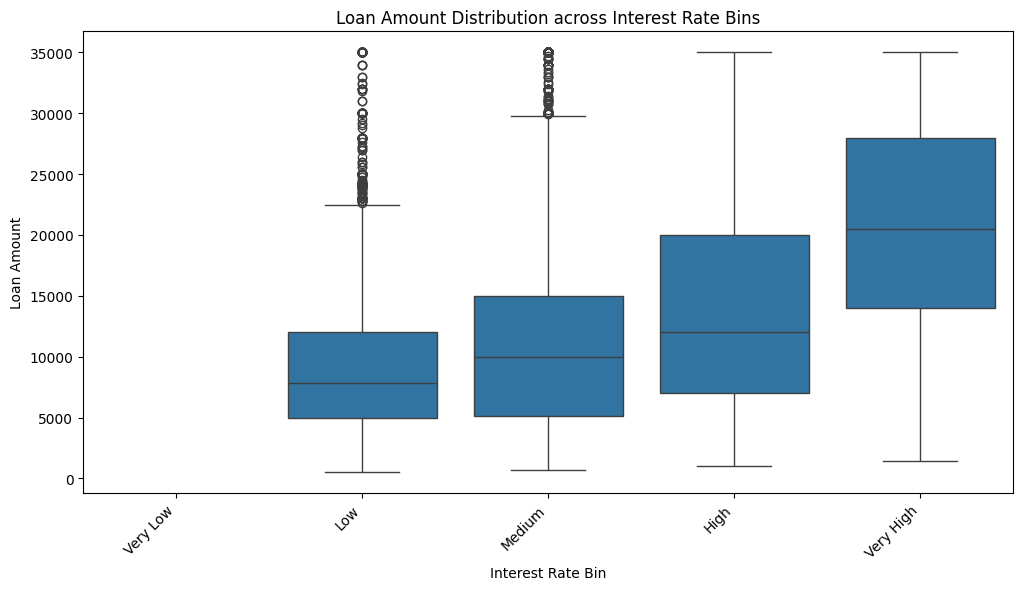

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='int_rate_bin', y='loan_amnt', data=df_cleaned, order=["Very Low", "Low", "Medium", "High", "Very High"])
plt.title('Loan Amount Distribution across Interest Rate Bins')
plt.xlabel('Interest Rate Bin')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show() # Display the plot

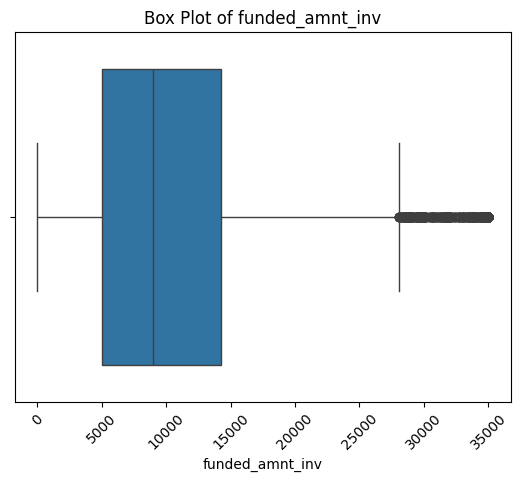

In [ ]:
sns.boxplot(x=df_cleaned['funded_amnt_inv'])
plt.title('Box Plot of funded_amnt_inv')
plt.xlabel('funded_amnt_inv')
plt.xticks(rotation=45)
plt.show()

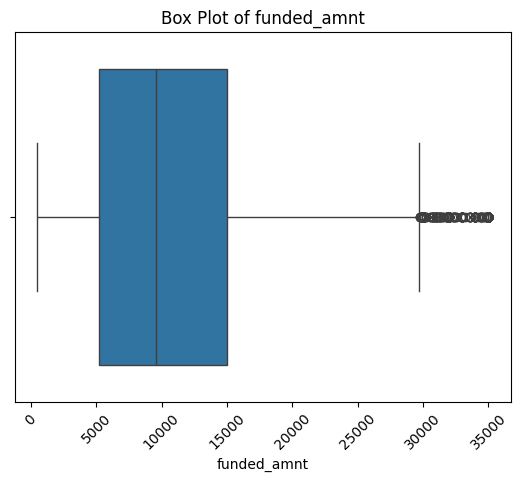

In [ ]:
sns.boxplot(x=df_cleaned['funded_amnt'])
plt.title('Box Plot of funded_amnt')
plt.xlabel('funded_amnt')
plt.xticks(rotation=45)
plt.show()

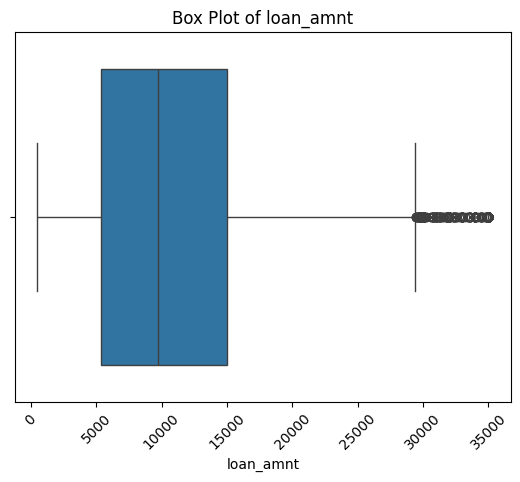

In [ ]:
sns.boxplot(x=df_cleaned['loan_amnt'])
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')
plt.xticks(rotation=45)
plt.show()

**df_cleaned summary**

In [ ]:
#Post cleaning outliers from the data
## Number of rows and columns
print('Number of Columns:',df_cleaned.shape[1])
print('Number of Rows:',df_cleaned.shape[0])
## Number of missing values
print('Number of missing values:',df_cleaned.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',df_cleaned.nunique().sum())
## Number of duplicates
print('Number of duplicates:',df_cleaned.duplicated().sum())

Number of Columns: 53
Number of Rows: 37808
Number of missing values: 0
Number of unique values: 247708
Number of duplicates: 0


Distribution of Loan amount

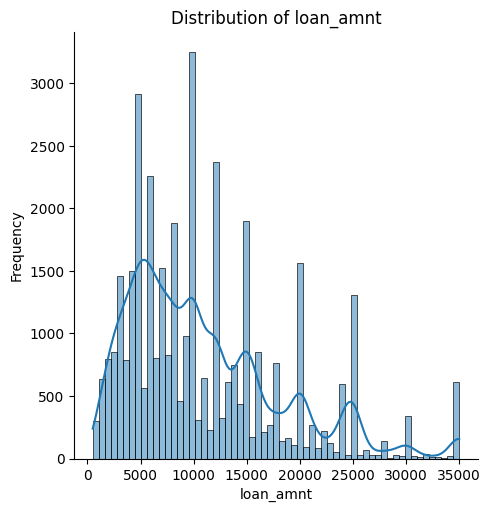

,loan_amnt
count,37808.000000
mean,11072.435067
std,7362.475269
min,500.000000
25%,5400.000000
50%,9750.000000
75%,15000.000000
max,35000.000000


In [ ]:
columns_to_clean = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'installment']
column_name = columns_to_clean[0]  # Replace with your column name
# Create the distribution plot
sns.displot(df_cleaned[column_name], kde=True)  # kde=True adds a kernel density estimate
# Customize the plot
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
# Show the plot
plt.show()
df_cleaned[column_name].describe()

# bi-vairant analysis


In [ ]:
df_cleaned["loan_status"].value_counts()

,count
loan_status,
Fully Paid,32371
Charged Off,5437


In [ ]:
df_cleaned["annual_inc"].value_counts()

,count
annual_inc,
60000.0,1440
50000.0,1013
40000.0,841
30000.0,790
45000.0,790
...,...
42320.0,1
106452.0,1
74263.0,1


**Loan amount vs Mean annual income**

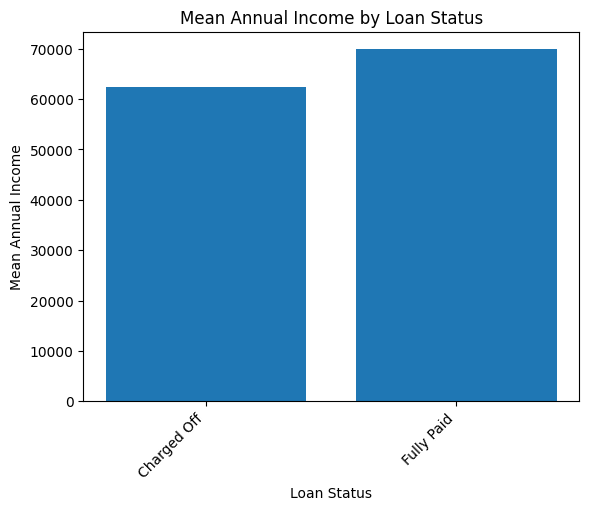

In [ ]:
# annual income increase the charged off ratio decreasing
grouped_data = df_cleaned.groupby('loan_status')['annual_inc'].mean()
plt.bar(grouped_data.index, grouped_data.values)
plt.title('Mean Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Mean Annual Income')
plt.xticks(rotation=45, ha='right')
plt.show()

**Loan Amount vs. Annual Income**

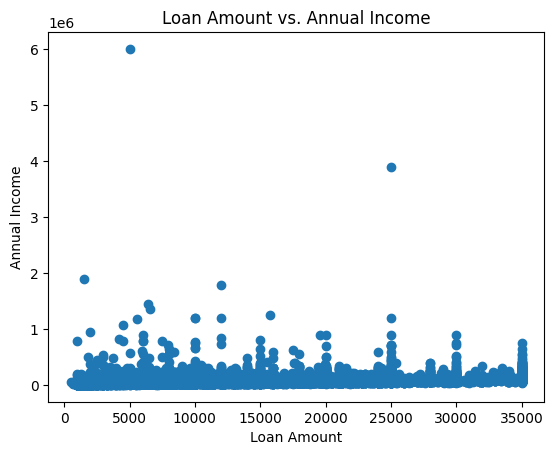

In [ ]:
# Assuming 'df_cleaned' is your DataFrame
plt.scatter(df_cleaned['loan_amnt'], df_cleaned['annual_inc'])

plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')

plt.show() # Display the plot

**visualizing 'grade', 'term', 'loan_status' with mean 'loan_amt'**





In [ ]:
# Assuming 'df_cleaned' is your DataFrame
grouped_data = df_cleaned.groupby(['grade', 'term', 'loan_status'])['loan_amnt'].mean()
print(grouped_data) # To see the output, run the code.

grade  term  loan_status
A      36    Charged Off     7732.142857
             Fully Paid      8647.700860
       60    Charged Off     9694.594595
             Fully Paid     10202.513966
B      36    Charged Off     9221.102863
             Fully Paid     10073.986652
       60    Charged Off    14507.876712
             Fully Paid     14723.936450
C      36    Charged Off     8852.278481
             Fully Paid      9278.348402
       60    Charged Off    14570.732932
             Fully Paid     15389.048673
D      36    Charged Off    10004.748603
             Fully Paid     11022.979013
       60    Charged Off    14575.560748
             Fully Paid     14318.142097
E      36    Charged Off    11997.685185
             Fully Paid     12980.997001
       60    Charged Off    17032.209738
             Fully Paid     17063.117038
F      36    Charged Off    16808.163265
             Fully Paid     13476.027397
       60    Charged Off    19926.431298
             Fully Paid     1870

**Barplot for Loan Amount and Loan Status by Employment Length**

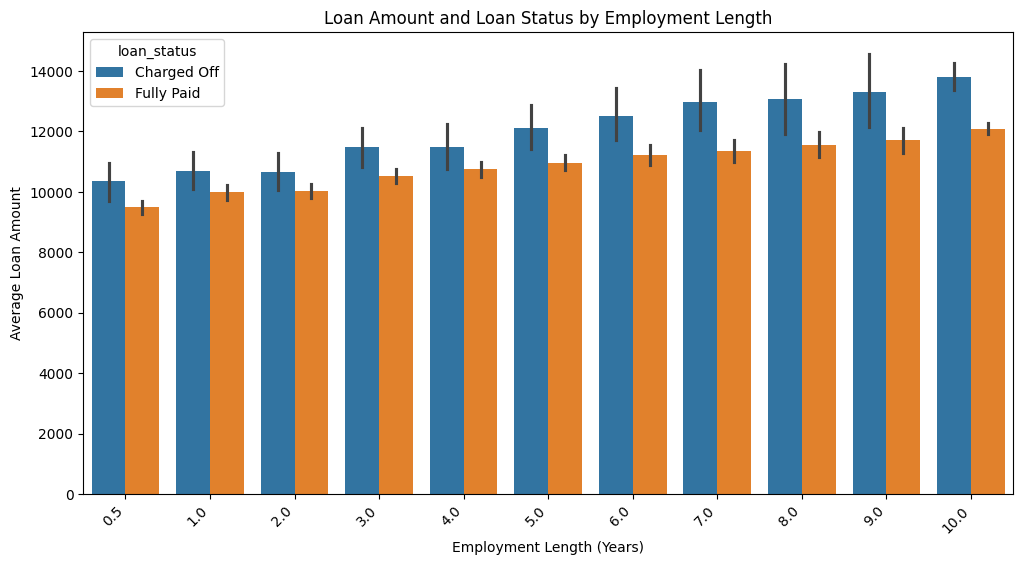

count      4333.000000
mean      60389.996661
std       41024.395785
min        4000.000000
25%       34000.000000
50%       50000.000000
75%       75000.000000
max      552000.000000
Name: annual_inc, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df_cleaned)

plt.title('Loan Amount and Loan Status by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# To see the annual income for those with 0.5 years of employment length:
annual_inc_0_5 = df_cleaned[df_cleaned['emp_length'] == 0.5]['annual_inc'].describe()
print(annual_inc_0_5) # To see the output, run the code.

**Purpose vs Int Rate Bin**

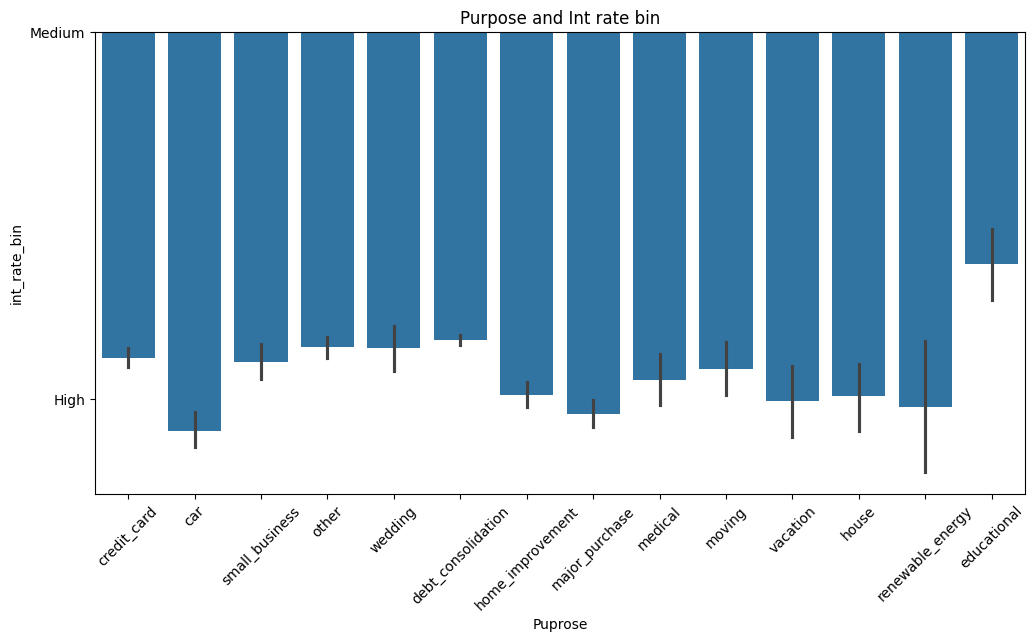

In [ ]:

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='purpose', y='int_rate_bin', data=df_cleaned)

plt.title('Purpose and Int rate bin')
plt.xlabel('Puprose')
plt.ylabel('int_rate_bin')
plt.xticks(rotation=45)
plt.show()

**Purpose and Int Rate**

In [ ]:
grouped_data = df_cleaned.groupby('purpose')['int_rate'].mean().reset_index()
grouped_data

,purpose,int_rate
0,car,10.467072
1,credit_card,11.642253
2,debt_consolidation,12.413020
3,educational,11.749243
4,home_improvement,11.311841
5,house,12.189611
6,major_purchase,10.794487
7,medical,11.445544
8,moving,11.558342
9,other,11.761037


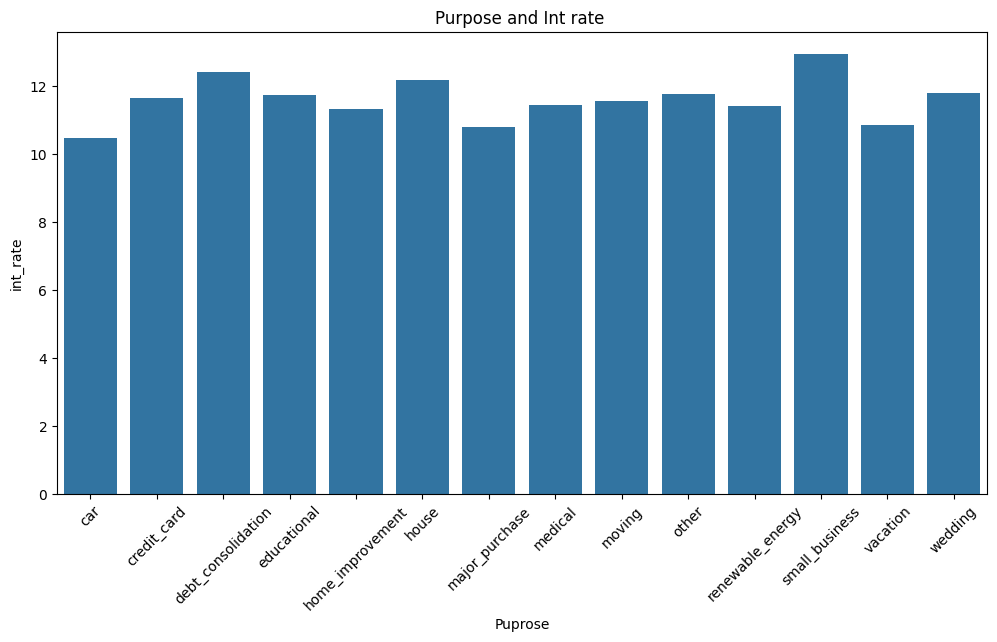

In [ ]:

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='purpose', y='int_rate', data=grouped_data)

plt.title('Purpose and Int Rate')
plt.xlabel('Puprose')
plt.ylabel('int_rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
grouped_data1 = df_cleaned.groupby('verification_status')['emp_length'].mean().reset_index()
grouped_data1

,verification_status,emp_length
0,Not Verified,4.948590
1,Source Verified,4.816413
2,Verified,5.701518


**verification_status and emp_length**

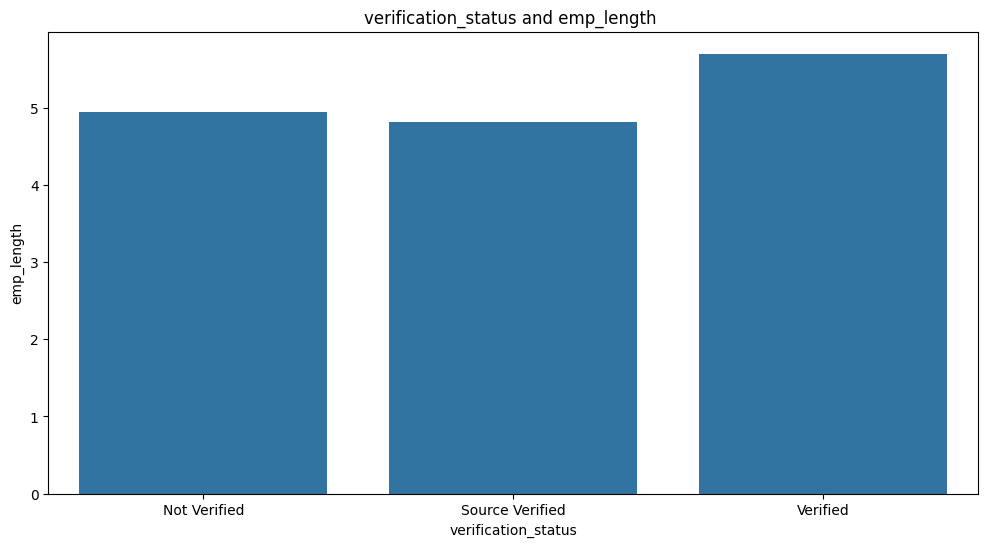

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='verification_status', y='emp_length', data=grouped_data1)

plt.title('verification_status and emp_length')
plt.xlabel('verification_status')
plt.ylabel('emp_length')
plt.show()